# Regularization
* Regularization seeks to solve a few common model issues by:
    * Minimizing model complexity
    * Penalizing the loss function
    * Reducing model overfitting (add more bias to reduce model variance)
* In general we, can think of regularization as a way to reduce model overfitting and variance
    * Requires some addional bias
    * Requires a search for optimal penalty hyperparameter
* Three main types of Regularization:
    * L1 Regularization
        * LASSO Regression
    * L2 Regularization
        * Ridge Regression
    * Combining L1 and L2
        * Elastic Net


* L1 regularization adds a penalty equal to the **absolute value** of the magnitude of coefficients
    * Limits the size of the coefficients
    * Can yield squarse models where some coefficients can become zero
    * the residual sum square  add the penalty term (RSS + $\lambda\sum_{j=1}^p |\beta_j|$)
    * the $\lambda$ coefficient is a hyper parameter that we can tune
* L2 regularization adds a penalty equal to the **square** of the magnitude of coefficients
    * All coefficients are shrunk by the same factor
    * Does not necessarily eliminate coefficients
    * The penalty error term is like this $\lambda\sum_{j=1}^p \beta^2_j$
* In the case the $\lambda = 0 $ is no longer present the regularization => it just the residual sum square
* Elastic net combines L1 and L2 with the addition of alpha parameter deciding the ratio between them
    * <img src="https://media.geeksforgeeks.org/wp-content/uploads/20200723010928/Elastic_1.png">
    * if alpha = 0 => not consider the absolute value term
    * if alpha = 1 => not consider the square value
* These regularization methods do have a cost:
    * **Tuning** is the process of maximizing a model's performance without overfitting or creating too high of a variance.
    * Introduce an additional hyperparameter that needs to be tuned
    * A multiplier to the penalty to decide the "strength" of the penalty
* Cover the L2 regularization (Ridge Regression) first, due to the intuition behind the squared term being easier to understand
* Before we dive straight into coding regularization with Scikit-learn, we need to discuss a few more relevant topics ( goign to specify apply to how we actually **tune** that hyper parameter the penalty term:
    * Feature Scaling
    * Cross Validation

# Feature Scaling
* Feature scaling provides many benefits to our machine learning process
* Some machine learning models that rely on distance metrics (e.g. KNN) require scaling to perform well
* Let discuss the main idea behind feature scaling
* The benefit of feature scaling
    * Feature scaling improves the convergence( the process of moving together from different directions and meeting) of steepest descent algorithms, which do not possess the property of scale invariance
    * If features are on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in weight updates
    * Critical benefit of feature scaling related to gradient descent
    * Can lead to great increase in performance
    * Absolutely necessary for some models
    * Virtually no "real" downside to scaling features
* There are some ML Algos where scaling won't have an effect (e.g CART based methods)
* Scaling the features so that their respective ranges are uniform is important in comparing measurements that have different units
* Allows us directly compare model coefficients to each other
* Feature scaling caveats (a warning that particular things need to be considered before something can be done):
    * Must always scale new unseen data before feeding to model
    * Effects direct interpretability of feature coefficients
        * Easier to compare coefficients to one another, harder to relate back to original unscaled feature.
* Two main ways to scale features:
    * Standardization
        * Rescales data to have a mean ($\mu$) of 0 and standard deviation ($\sigma$) of 1
        $X_{changed} = \frac{X-\mu}{\sigma}$

        * Namesake can be confusing since this is also referred to as "Z-score normalization"
    * Normalization
        * Rescales all data values to be between 0-1
        * $X_{changed} = \frac{X-X_{min}}{X_{max} - X_{min}}$
        * Simple and easy to understand
* There are many more methods of scaling features and Scikit-learn provides easy to use clesses that "fit" and "transform" feature data for scaling
* Let's quickly discuss the fit and transform calls in more detail when it comes to scaling
* A .fit() method call simply calculates the necessary statistics (Xmin, Xmax) for normalization, (mean, standard deviation) for standardization
* A .transform() call actually scales data and returns the new scaled version of data.
* Previously saw a similar process for polynomial feature conversion
* Very important consideration for fit and transform:
    * We only **fit** to training data
    * Calculating statistical information should only come from training data
    * Don't want to assume prior knowledge of the test set
* Using the full data set would cause **data leakage**:
    * Calculating statistics from full data leads to some information of the test set leaking into the training process upon transform() conversion
* Feature scaling process:
    * Perform train test split
    * Fit to training feature data
    * Transform training feature data
    * Transform test feature data
* Do we need to scale the **label (y target)**:
    * In general, it is not necessary nor advised
    * Normalising the output distribution is altering the definition of the target
    * Predicting a distribution that doesn't mirror your real-world target
    * Can negatively impact stochastic gradient descent
* Now that we understand the benefits of feature scaling, let's move on to understanding the benefits of cross-validation

# Cross Validation
* Cross validation is a more advanced set of methods for splitting data into training and testing sets
* Cross Validation relevant reading:
    * Section 5.1 of ISLR
* We understand the intuition behind performing a train test split, we want to fairly evaluate our model's performance on unseen data
* Unfortunately this means we are not able to tune hyperparameters to the entire dataset (only the training data, holding for the test data)
* Is there a way we can achieve the following:
    * Train on all the data
    * Evaluate on all the data
* While it sounds impossible, we can achieve this with cross validation!
* Let's have an overview of the concept...
* Let's convert this data into colored blocks for cross-validation


<table class="center">
<tr>
<th>Area $m^2$</th>
<th>Bedrooms</th>
<th>Bathrooms</th>
<th>Price</th>
</tr>

<tr>
<th>200</th>
<th>3</th>
<th>2</th>
<th>500,000</th>
</tr>

<tr>
<th>190</th>
<th>3</th>
<th>2</th>
<th>450,000</th>
</tr>

<tr>
<th>230</th>
<th>3</th>
<th>3</th>
<th>650,000</th>
</tr>

<tr>
<th>180</th>
<th>1</th>
<th>1</th>
<th>400,000</th>
</tr>

<tr>
<th>210</th>
<th>2</th>
<th>2</th>
<th>550,000</th>
</tr>
</table>

* For now just consider training vs testing:

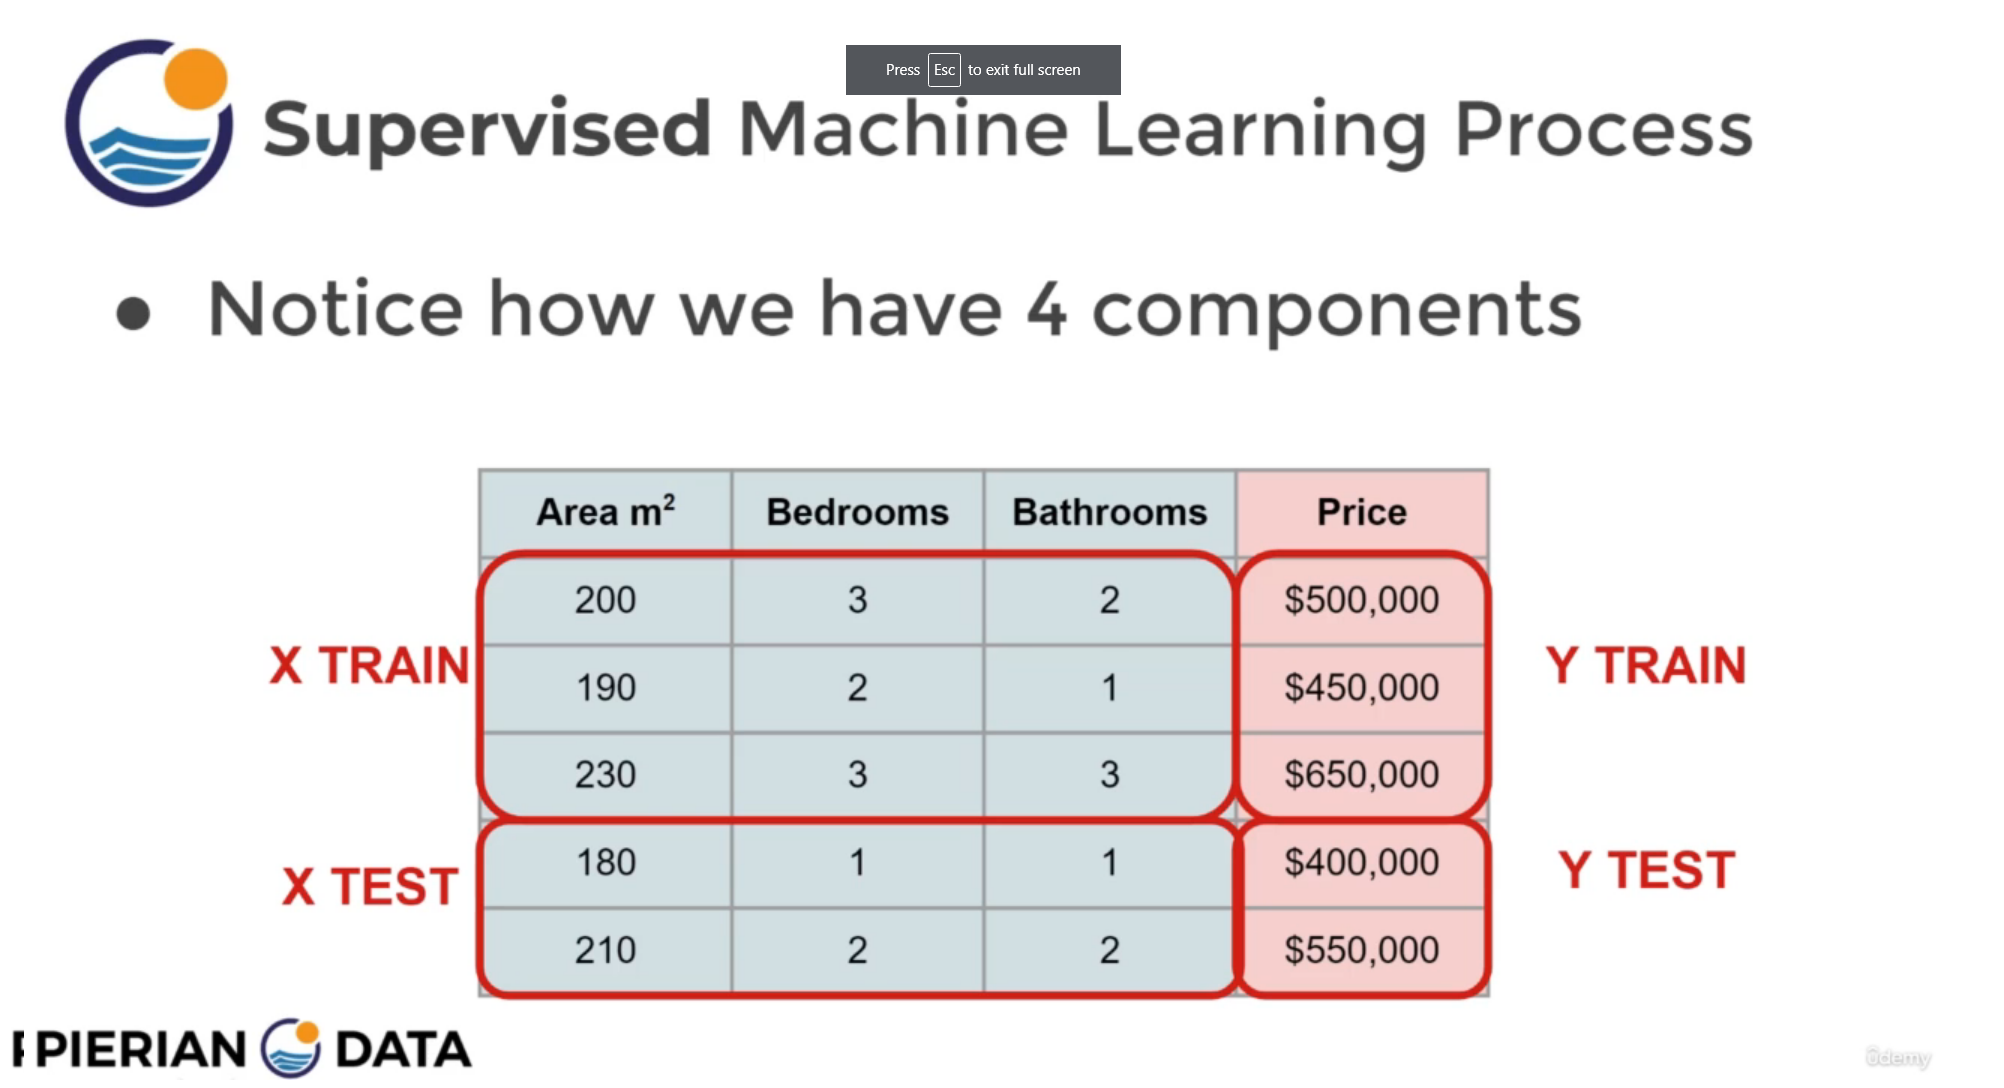

In [151]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\07-Overview-of-Machine-Learning\traintest.png")

* Rotate it and resize it => now we can represent full data and splits
* Let's start with the entire original data
* How does cross validation work?
* Split data into K equal parts (K is a number upto you decide)
* 1/K left as test set (10% test set, 90% training set)
* Train the model and get error metric for split:
* Repeat for another 1/K split
* Keep repeating for all possible splits (split K number of times)
* Then get average error
* Average error is expected performance
* Benefits
    * We were able to train on all data and evaluate on all data!
    * We get a better sense of true performance across multiple potential splits
* What is the cost of this?
    * We have to repeat computations K number of times
* This is known as K-fold cross-validation
* Common choice for K is 10 so each test set is 10% of your total data
* Largest K possible would be K equal to the number of rows.
    * This is known as **leave one out cross validation**
    * Computationally expensive!
* One consideration to note with K-fold cross validation and a standard train test split is fairly **tuning hyperparameters**.
* If we tune hyperparameters to test data performance, are we ever fairly getting performance metrics?
* **How can we understand how the model behaves for data that is has not seen and not been influenced by for hyperparameter tuning?**
    * For this we can use a hold out test set
    * Let's explore what is look like
    * Start with entire data set
    * Remove a hold out test set (remove your test set)
    * Perform "classic" train test split then Train and tune on this data
    * Or K-Fold cross validation then train and tune on this data
    * After training and tuning perform final evaluation hold out test set
    * Can not tune after this final test evaluation
* Train | Validation | Test split
    * Allows us to get a true final performance metric to report
    * No editing model after this
* All these approaches are valid, each situation is unique!
* Keep in mind:
    * Previous modeling work
    * Reporting requirements
    * Fairness of evaluation
    * Context of data and model
* Many regularization methods have tunable parameters we can adjust based on cross-validation techniques
* For simplicity, there are times in the course we will opt for a simple two part train test split

# Regularization for linear regression - Data set up
---
#### Import environment

In [152]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

---
### Change the backgrounds

In [153]:
mpl.rcParams.update({"figure.facecolor": "white"})

In [154]:
df = pd.read_csv(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [155]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Scaling data

In [156]:
X = df.drop(labels="sales", axis=1)

In [157]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [158]:
y = df["sales"]

In [159]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

### Run polynomial model

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [162]:
polynomial_feature = polynomial_converter.fit_transform(X)

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_feature, y, test_size=0.3, random_state=101)

In [165]:
X_train

array([[1.93200000e+02, 1.84000000e+01, 6.57000000e+01, ...,
        2.22433920e+04, 7.94234160e+04, 2.83593393e+05],
       [2.87600000e+02, 4.30000000e+01, 7.18000000e+01, ...,
        1.32758200e+05, 2.21675320e+05, 3.70146232e+05],
       [8.02000000e+01, 0.00000000e+00, 9.20000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.78688000e+02],
       ...,
       [2.39800000e+02, 4.10000000e+00, 3.69000000e+01, ...,
        6.20289000e+02, 5.58260100e+03, 5.02434090e+04],
       [2.14700000e+02, 2.40000000e+01, 4.00000000e+00, ...,
        2.30400000e+03, 3.84000000e+02, 6.40000000e+01],
       [1.63300000e+02, 3.16000000e+01, 5.29000000e+01, ...,
        5.28238240e+04, 8.84297560e+04, 1.48035889e+05]])

#### Scale the data - Feature Scaling

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()

* Only fit the X_train test to avoid the **data leakage** as mention above
* Don't need to scale the `y_train`

In [168]:
scaler.fit(X_train)

StandardScaler()

In [169]:
X_train = scaler.transform(X_train)

In [170]:
X_test = scaler.transform(X_test)

* The value of `scaler_X_train` quite small compare to the original one
* It scaled down to very much value to get the same range

In [171]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [172]:
X_test[0]

array([-0.91339472,  1.76259419,  0.68168558, -0.96397506,  0.01521221,
       -0.29304821,  2.31532893,  1.56001049,  0.36991011, -0.87527811,
       -0.53295016, -0.54312331,  0.43542739,  0.18669917, -0.2012045 ,
        2.77252075,  2.09516506,  0.89465642,  0.09868885])

In [173]:
polynomial_feature[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

# Ridge Regression - Theory and Intuition - First form of regularization

* Ridge regression is a regularization technique that works by helping **reduce the potential for overfitting** to the training data
* It does this by adding in a penalty term to the error that is based on **the squared value** of the coefficients
* Ridge Regression is a regularization method for Linear Regression
* Relevant reading in ISLR:
    * Section 6.2.1
* Let's explore the main concepts behind how ridge regression work
* Recall the general formula for the regression line:
    * $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_p}x_p$
* These Beta coefficients were solved by minimizing the residual sum of squares (RSS)
    * RSS = $\sum_{i=1}^n (y_i -\hat{y}_i)^2$
* We could substitute our regression equation for **$\hat{y}$**:
    * RSS = $\sum_{i=1}^n (y_i -\hat{y}_i)^2 = \sum_{i=1}^n (y_i - \hat{\beta_0} - \hat{\beta_1}x_1 - \hat{\beta_2}x_2 + ... - \hat{\beta_p}x_p)^2$
    * We can then summarize RSS as:
        * RSS = $\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p\beta_j x_{ij})^2$
    * The goal of Ridge Regression is to help prevent overfitting by adding an additional penalty term
    * Ridge Regression adds a **shrinkage penalty**:
        * Error = $\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p\beta_j x_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2$
    * Ridge regression seeks to minimize this entire error term **RSS + Penalty**
    * **Shrinkage penalty** based off the squared coefficient:
        * $\lambda\sum_{j=1}^p\beta_j^2$
        * The shrinkage penalty not only based on the beta coefficient but also the beta coefficient **square**!
    * **Shrinkage penalty** has a **tunable lambda parameter**!
        * $\lambda\sum_{j=1}^p\beta_j^2$
        * The lamb will just determine how severe the penalty
        * In theory it can be any value from 0 to positive infinity
        * If it zero, then it simply reverts back to RSS


* Let explore a simple thought experiment to get an intuition behind Ridge Regression
* Try to consider the simplest case, only one single feature, which means you only solving for that beta coefficient times that feature because the actual shrinkage penalty only consider Beta of J, which just the single beta coefficient being multiple by you single feature
* Imagine the following chart, we can split it into a training set and test set
* Now we can fit on the training data to produce the line: $\hat{y} = \beta_1x + \beta_0$
* Regardless of RSS or Ridge error, we're still trying to create a line: $\hat{y} = \beta_1x + \beta_0$
* Using the ridge regression doesn't actually change the formula of the line, it just changes what you are trying to minimize
* The only difference would be the coefficient found not the formular
* First let's fit using only RSS
    * Minimizing the RSS
    * Our fitted: $\hat{y} = \beta_1x + \beta_0$
    * Appears to have over fit to training data - this mean we have high **variance**
    * You'are essentially fitting to a lot more noise in the training data than actually generalizing to the entire dataset
    * We know there is a **bias-variance** trade-off
    * But could we introduce a little more **bias** to significantly **reduce** variance?
    * Would adding the penalty term help generalize with more **bias**
    * Adding bias can help generalize: $\hat{y} = \beta_1x + \beta_0$
    * <img src="https://d3i71xaburhd42.cloudfront.net/3c38bfb45635b16b3d21f5e918ed43470e878979/250px/3-Figure1-1.png">
    * So is's more biased and it's not picking up as much noise or variance. So it's going to get not as good of a fit to the training data
    * But when it comes to new unseen data overall, it gives you a better fit kind
* Let's imagine trying to reduce the Ridge Regression error term:
    * There is a lambda($\lambda$) and the squared slope coefficient
    * Consider the lambda = 1
    * This punishes a large slope for $\hat{y} = \beta_1x + \beta_0$
        * $\beta_1$ is the slop of this line
        * If you are introducing this shrinkage term, which is trying to minimize this idea of beta squared
        * That means even small increase in beta one
        * The slope of your line ($\beta_1$) is going to really start to show up a lot more in this squared term
        * Then the lambda parameter would just be a tuning factor of how much you want to punish by beta coefficient squared
        * But regardless of lambda, as long it's not equal to zero, we're still going to punish those larger slopes
        * For single feature this lowers slope
        * AT the cost of some additional bias (error in training set)
        * We generalize better to unseen data
* Consider overfitting to training set (only has 1 feature X):
    * An increase in X results in a greater y respone
    * If we add the penalty => model with less steep line
    * Compare to a more generalized model that used ridge regression
    * The punishment will reduce the slop of line (beta 1)
    * Same feature change does not produce as much y response
    * Trying to minimize a squared beta term leads us to punish larger coefficients
    * In the case of single feature, a larger Beta means a steeper sloped line
    * A steeper sloped line would mean more response per increase in X value
    * What about the lambda term? how much should we punish these lager coeffcients?
        * We simply use cross-validation to explore multiple lambda options and then choose the best one


# L2 regularization - ridge regression
* Important note!
    * Sklearn refers to **lambda** as **alpha** within the class call!
    * The reason for that being is the tunable hyper parameter across many different model types within Sklearn is just always called alpha
    * That way you don't need to memorize all these Greek letter referring to specific equations for various model
    * Error = $\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p\beta_j x_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2$
    * For cross validation metrics, sklearn uses a "scorer object"
    * All scorer objects follow the convention that *higher* return values are better than *lower* return value
        * For example, obviously higher accuracy is better
        * But higher RMSE is actually worse
        * So Scikit-learn fixes this by using a **negative** RMSE as its scorer metrics
        * This allows for uniformity across all scorer metrics, even across different tasks types
        * The same idea of uniformity across model classes applies to referring to penalty strength parameter as alpha

In [174]:
from sklearn.linear_model import Ridge

In [175]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be 

In [176]:
ridge_model = Ridge(alpha=10, random_state=101)

In [177]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10, random_state=101)

In [178]:
ridge_model_pre = ridge_model.predict(X_test)

In [179]:
ridge_model_pre

array([13.7469803 , 19.17764   , 11.8623393 , 16.25574551,  8.92891155,
        8.04595366, 20.13320851, 16.94847676, 10.29219174, 19.78365691,
       10.31758361, 13.44077317, 12.24228062, 23.23864236, 19.12656362,
        9.748809  , 12.84361521,  9.14248129,  8.82504966, 21.46989971,
        8.25222201, 18.8110776 , 28.39227333, 25.06911066,  9.11912241,
       11.8071711 , 20.85199462,  9.31962495, 12.25122303,  9.07811198,
        9.25275556, 19.87154568, 10.55955497,  7.86818084, 17.67220132,
        9.31442423, 10.1539168 ,  9.47802944,  8.63337302, 10.76209179,
       11.63848891, 10.38883411, 10.90270005,  8.40019284, 11.35336224,
       10.3514086 ,  8.00082147, 15.27139854, 12.94761469, 22.49762978,
       10.80165407, 13.01337743, 14.82204895, 11.37354043, 11.69628953,
        7.20576885, 25.53512232, 10.41926545, 17.38798022, 15.10158819])

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [181]:
MAE = mean_absolute_error(y_true=y_test, y_pred=ridge_model_pre)

In [182]:
MAE

0.5774404204714167

In [183]:
MSE = mean_squared_error(y_true=y_test, y_pred=ridge_model_pre)

In [184]:
MSE

0.8003783071528353

In [185]:
RMSE = np.sqrt(MSE)

In [186]:
RMSE

0.894638646131965

* Test for alpha (or lambda) = 10 is good data or not
* Using the cross validation

* Import ridge with validation
* The cross validation is just going to get the average error metric for all of these values

In [187]:
from sklearn.linear_model import RidgeCV

* `alphas` contains multiple alphas for your testing
* `cv` = None will take a long time to run in the large data set
* `scoring="neg_mean_absolute_error"` - the score metric wants to optimize

In [188]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring="neg_mean_absolute_error")

* Only using test on the X train and y train for hyper parameter tuning
* The training set = the whole data set - the hold out data set

In [189]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

* Which alpha is best?
* `_` represent the execution of all available alphas to figure out the best alpha


In [190]:
ridge_cv_model.alpha_

0.1

* The question arises is what was this actually using to measure the best performing alpha? => using the `scoring metric`
* Base off the `scoring metric` to choose the best alpha
* Or following the link: https://scikit-learn.org/stable/modules/model_evaluation.html

In [191]:
from sklearn.metrics import SCORERS

In [192]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [193]:
ridge_cv_predict = ridge_cv_model.predict(X_test)

In [194]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

* Calculate MAE and RMSE

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [201]:
MAE_rigde = mean_absolute_error(y_true=y_test, y_pred=ridge_cv_predict)

In [202]:
MAE_rigde

0.4273774884351013

In [203]:
RMSE_rigde = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridge_cv_predict))

In [204]:
RMSE_rigde

0.6180719926948981

* none of those coefficients are zero

In [206]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [207]:
ridge_cv_model.scoring

'neg_mean_absolute_error'

# L1 regularization - Lasso regression
* **LASSO - least absolute shrinkage and selection operator**
* L1 regularization adds a penalty equal to the **absolute value** of the magnitude (great size or importance of something) of coefficients
* Only care about the absolute value
    * Limits the size of the coefficients
    * Can yield sparse models where some coefficients can become zero
* LASSO can force some of the coefficient estimates to be exactly equal to zero when tuning parameter $\lambda$ is sufficiently large
* Similar to subset selection, the LASSO performs variable selection
* Models generated from the LASSO are generally much easier to interpret
* **LASSOCV** with sklearn operates on checking a number of alphas within a range, instead of providing the alpha directly


* Call out the Lasso need to choose the alpha
* At first, we don't need to choose the alpha => using the LassoCV to figure out the best hyper parameter tuning

* There different types of Lasso and different cross validation for Lasso model to consider such as:
    * LassoLarsCV - based on the least angle regression algorithm
    * LassorLarsIC
        * Akaike information criterion (AIC)
        * the Bayes information criterion (BIC)

In [209]:
from sklearn.linear_model import LassoCV


`eps` - is the length of the path, which is the ratio between the alpha min and alpha max
`n_alphas` - number of alphas where to compute the models. If `None` alphas are set automatically


* Increase the `n_alphas` => check more the alpha values, and the `eps` also smaller
* The small of eps, the higher of checking
* `cv` the numer of folds in K fold cross validation by default
* Change the max_iter to increase the maximum possible iterations, we can increase the likelihood that it converges
* To avoid the increase of `max_iter`, we could reduce the `eps`
* You should increase the `max_iter` and reduce the `eps` to figure out more the data

In [210]:
lasso_model = LassoCV(eps=1e-3, n_alphas=100, max_iter=1000000, cv=5)

In [211]:
lasso_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [212]:
lasso_test_prediction = lasso_model.predict(X_test)

In [213]:
lasso_test_prediction

array([14.16203485, 19.2942685 , 12.34178429, 16.97745571,  8.02340978,
        6.95799942, 20.11875833, 17.32880647, 10.43139937, 19.96174466,
        9.56959473, 13.94205676, 11.90851817, 23.35138146, 19.56656277,
        9.27838151, 12.30485359,  9.30152997,  8.56733436, 21.51633564,
        7.06650884, 19.3377222 , 27.28027149, 24.52239173,  9.17172464,
       11.60918126, 20.73841405,  9.29953525, 12.56948515,  8.40051066,
        8.56984613, 20.03587647, 10.83439653,  6.79505173, 18.18820331,
        9.48107219, 10.41803957,  9.70785725,  7.22932328, 10.85467692,
       12.85491418, 10.51648453, 11.26905127,  7.41516944, 11.54705407,
       10.42233031,  6.02782344, 15.36338733, 13.18723611, 22.67619584,
       10.4721906 , 13.01165791, 14.56684361, 11.90062303, 11.47303307,
        5.59404766, 25.06115365,  9.69468957, 17.44771723, 15.60375637])

* Calculate the `mean_squared_error` and `mean_absolute_error`

* Not good as the L2 regression
    * MAE_ridge
    * RMSE_ridge

In [219]:
MAE_rigde

0.4273774884351013

In [214]:
MAE_lasso = mean_absolute_error(y_true=y_test, y_pred=lasso_test_prediction)

In [215]:
MAE_lasso

0.4335034618590078

In [217]:
RMSE_lasso = np.sqrt(mean_squared_error(y_true= y_test, y_pred=lasso_test_prediction))

* More good than the L2 regression

In [220]:
RMSE_rigde

0.6180719926948981

In [218]:
RMSE_lasso

0.6063140748984043

* In the case of eps = 0.1
    * The reason for the not good as L2
    * The majority of coef is 0 => only consider 2 features
* In the case of eps = 1e-3, max_iter = 1000000
    * Get more time to search for better alpha values
    * Get more complex model
    * Lots of them still 0, but it's now considering more alpha
    * Not considering all of features

# Elastic Net - L1 and L2 Regularization
* We have been able to perform Ridge and Lasso regression
* We know Lasso is able to shrink coefficients to zero (but don't no how), but we haven't taken a deeper dive into how or why that is.
* This ability becomes more clear when learning about **elastic net** which combines Lasso and Ridge together!
* Let's dive a little deeper into **Lasso**
    * Lasso was originally introduced in geophysics literature in 1986 by Symes and Santosa
    * It was later independently rediscovered and popularized in 1996 by Robert Tibshirani who coined the term "Lasso"
    * All the authors ha ve a history very impressive accomplishments
* We can rewrite Lasso and Ridge:



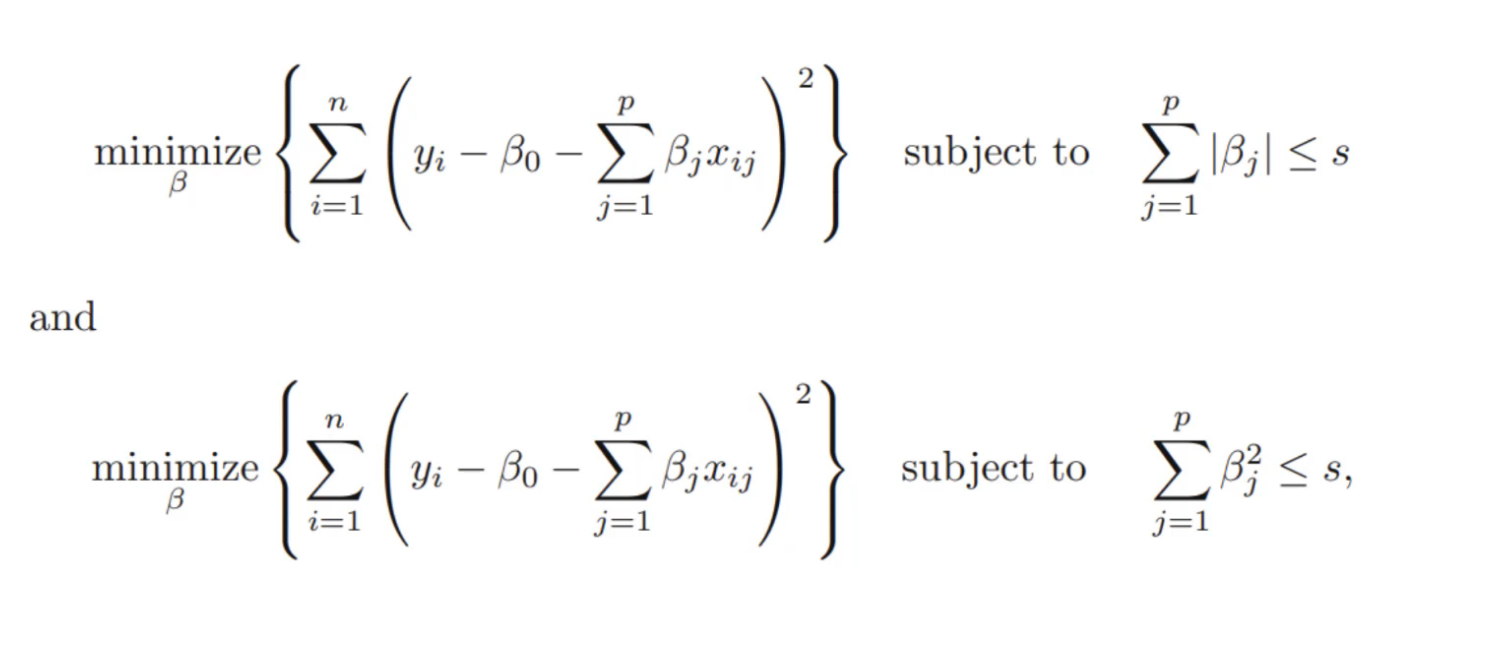

In [221]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\7.png")

* We minimize RSS subject to a condition
* That condition is penalty term
* There is some sum **s** which allows to rewrite the penalty as a requirement
* `s` will change depending on the set of feature you are working with
* Start with a simple though experiment:
    * A simple equation:
        * $\hat{y} = \beta_1x1 + \beta_2x2$
    * We know that regularization can be expressed as an additional requirement that RSS is subject to
    * L1 constrains the sum of absolute values
        * $\sum{|\beta|}$
    * L2 constrains the sum of squared values
        * $\sum{\beta}^2$
    * There is some sum **s** that the penalty is less than
    * For the case of only two features:
        * $\hat{y} = \beta_1x_1 + \beta_2x_2$
        * Lasso Regression Penalty:
            * $|\beta_1| + |\beta_2| <= s$

        * Ridge Regression Penalty:
            * $\beta_1^2 + \beta_2^2 <= s $
        * Plot the lasso regression and ridge regression:
            * <img src="https://qph.fs.quoracdn.net/main-qimg-70636b99ef7679e4713ab8871cff29bd">
    * What would RSS look like?
        * <img src="https://qph.fs.quoracdn.net/main-qimg-cd536c849f93739a27ae763d7ee31c20-lq">
    * Lasso:
        * A convex object that lies tangent to the boundary, is likely encounter a corner of a hypercube (high dimension), for which some components of $\beta$ are identically zero
    * Ridge: In the case of **an n-sphere**, the points on the boundary for which some of the components of $\beta$ are zero are not distinguished from the others and the convex object is no more likely to contact a point at which some components of $\beta$ are zero than one for which none of them are.
    * This is why LAsso is more likely to lead to coefficients as zero
    * This diagram is also commonly shown with contour RSS
    * Elastic Net seeks to improve on both L1 and L2 Regularization by combining them:
        * Error = $\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p\beta_j x_{ij})^2 + \lambda_1\sum_{j=1}^p\beta_j^2 + \lambda_2\sum_{j=1}^p|\beta_j|$
        * Here we seek to minimize RSS and **both** the squared and absolute value terms:
        * Notice there are **two** distinct lambda values for each penalty
        * We can alternatively express this as a ratio between L1 and L2
            * $\frac{\sum_{i=1}^n(y_i - x_i^J\hat{\beta})^2}{2n} + \lambda(\frac{1-\alpha}{2}\sum_{j=1}^{m}\hat{\beta_j^2} +\alpha\sum_{j=1}^m|\hat{\beta_j}|)$
        * Alpha is the ratio between the L1 and L2
    * We can also use simplified notation:


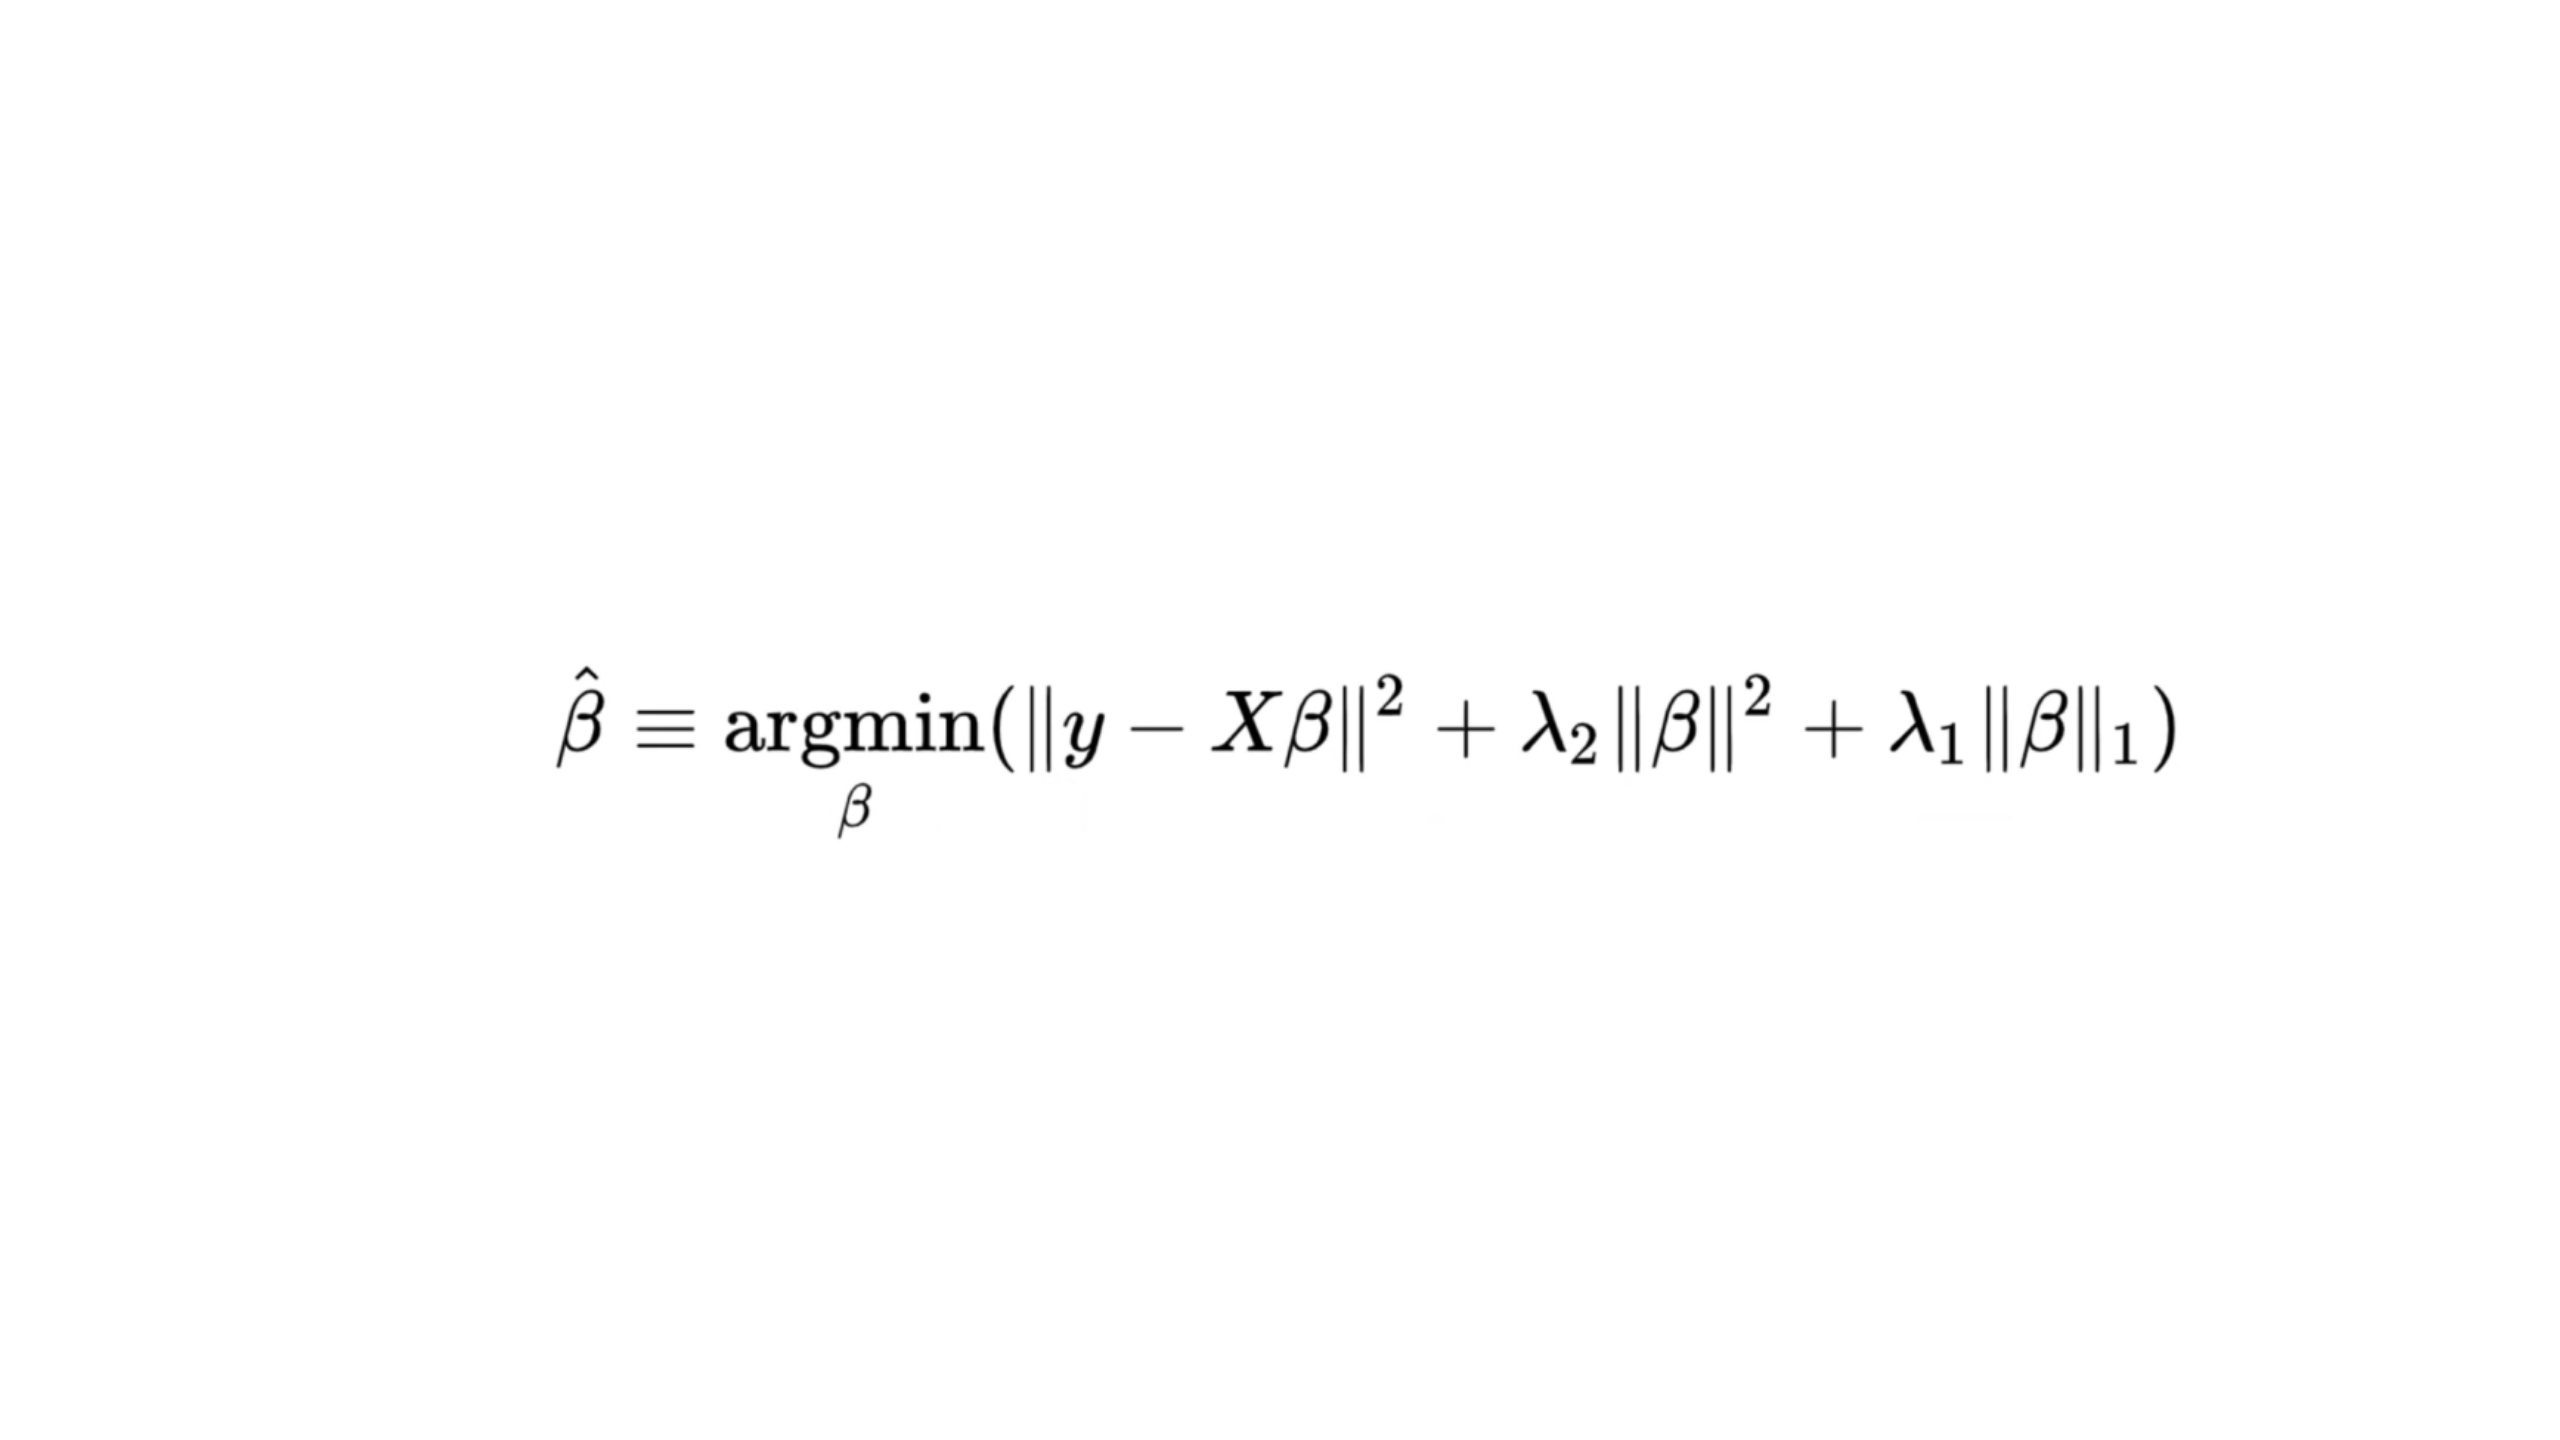

In [222]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\8.png")

* Elastic Net Penalty region:

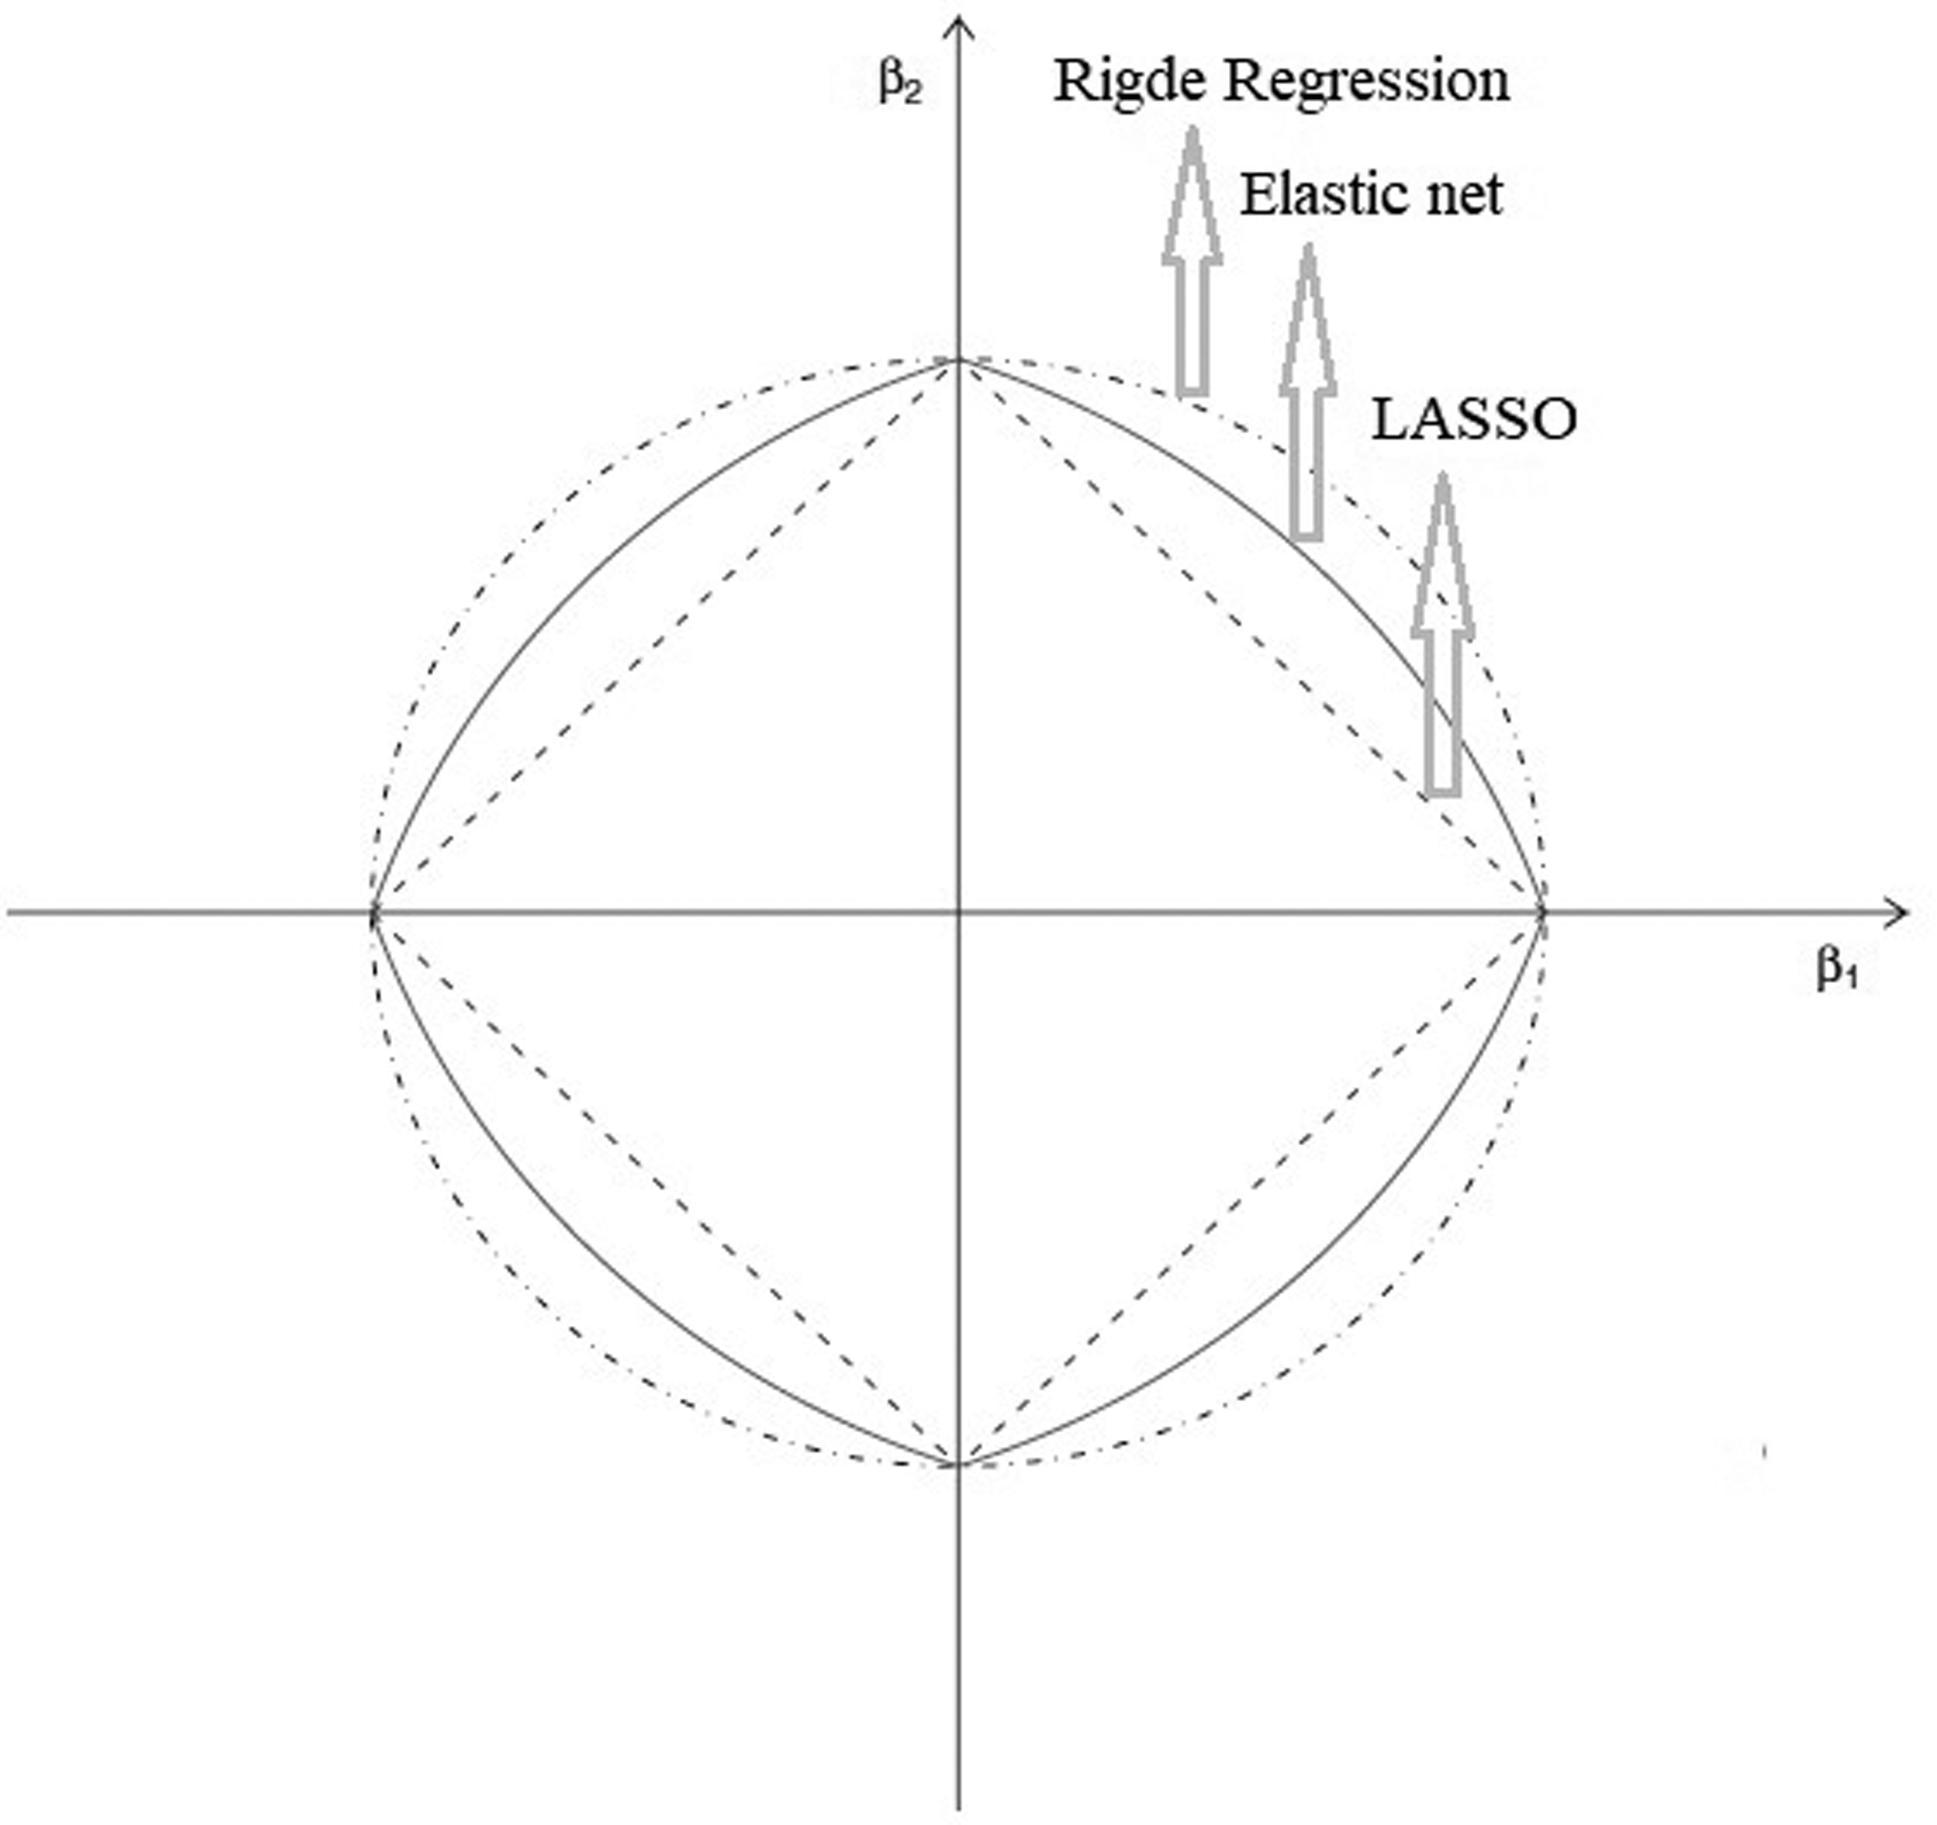

In [223]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\9.jpg")

* using the `ElasticNetCV` to testing different value of `l1_ratio` and `alpha` (`lambda`)

In [225]:
from sklearn.linear_model import ElasticNetCV

In [226]:
elasticnet_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-03, n_alphas=100, max_iter=1000000)

In [227]:
elasticnet_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

* Put `_` after the attribute name (`l1_ratio`) of a train model is going to be some feature hyper parameter of the model itself. It is going to return the best performing L1 ratio

* Put underscore in this case, disregarding Ridge and completely decided LAsso was the way to go

elasticnet_cv_model.l1_ratio_ = 1 => completely Lasso
elasticnet_cv_model.l1_ratio_ = 0 => completely Ridge
* Those information based on the equation of ration between the L1 and L2
    * * $\frac{\sum_{i=1}^n(y_i - x_i^J\hat{\beta})^2}{2n} + \lambda(\frac{1-\alpha}{2}\sum_{j=1}^{m}\hat{\beta_j^2} +\alpha\sum_{j=1}^m|\hat{\beta_j}|)$

In [228]:
elasticnet_cv_model.l1_ratio_

1.0

* Similar to the LASSO result
* Do not even trying with both LASSO and Ridge in Elastic model. Theorically, the Elastic net could just revert to a simple L1 model or L2 model on its own

In [232]:
elasticnet_cv_model.alpha_

0.004943070909225833

In [233]:
lasso_model.alpha_

0.004943070909225833

In [230]:
elasticnet_cv_prediction = elasticnet_cv_model.predict(X_test)

In [231]:
elasticnet_cv_prediction

array([14.16203485, 19.2942685 , 12.34178429, 16.97745571,  8.02340978,
        6.95799942, 20.11875833, 17.32880647, 10.43139937, 19.96174466,
        9.56959473, 13.94205676, 11.90851817, 23.35138146, 19.56656277,
        9.27838151, 12.30485359,  9.30152997,  8.56733436, 21.51633564,
        7.06650884, 19.3377222 , 27.28027149, 24.52239173,  9.17172464,
       11.60918126, 20.73841405,  9.29953525, 12.56948515,  8.40051066,
        8.56984613, 20.03587647, 10.83439653,  6.79505173, 18.18820331,
        9.48107219, 10.41803957,  9.70785725,  7.22932328, 10.85467692,
       12.85491418, 10.51648453, 11.26905127,  7.41516944, 11.54705407,
       10.42233031,  6.02782344, 15.36338733, 13.18723611, 22.67619584,
       10.4721906 , 13.01165791, 14.56684361, 11.90062303, 11.47303307,
        5.59404766, 25.06115365,  9.69468957, 17.44771723, 15.60375637])

In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [235]:
MAE_elastic_net = mean_absolute_error(y_true=y_test, y_pred=elasticnet_cv_prediction)

In [236]:
MAE_elastic_net

0.4335034618590078

In [237]:
RMSE_elastic_net = np.sqrt(mean_squared_error(y_true=y_test, y_pred=elasticnet_cv_prediction))

In [238]:
RMSE_elastic_net

0.6063140748984043